In [36]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd

In [6]:



with open('player_data/test_processed_player_data.pkl', 'rb') as fp:
    test_processed_player_data = pickle.load(fp)
with open('player_data/train_processed_player_data.pkl', 'rb') as fp:
    train_processed_player_data = pickle.load(fp)

instances = []
for player in train_processed_player_data:
    for season in train_processed_player_data[player]:
        instances.append(train_processed_player_data[player][season])
X = np.array(instances)

# kmeans.labels_
#     array([0, 0, 0, 1, 1, 1], dtype=int32)
# kmeans.predict([[0, 0], [4, 4]])
#     array([0, 1], dtype=int32)
# kmeans.cluster_centers_
#     array([[1., 2.],
#            [4., 2.]])

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



array([[ 1.82744116,  3.51515536,  0.13194386, ...,  1.85794414,
         1.89498473,  3.63917134],
       [ 2.01004768,  3.30965184,  0.16250789, ...,  1.58836324,
         1.89498473,  3.40932385],
       [ 1.68780088,  3.05848087,  0.08100381, ...,  0.64483012,
         1.37642958,  2.84354543],
       ...,
       [-1.2231619 , -1.23425933, -4.44247251, ..., -1.24223611,
        -0.69779101, -1.43515393],
       [-2.03952046, -1.55393147, -4.44247251, ..., -2.32055968,
        -1.47562373, -1.43515393],
       [-1.79246458, -1.32559423, -4.44247251, ..., -1.91618834,
        -1.08670737, -1.43515393]])

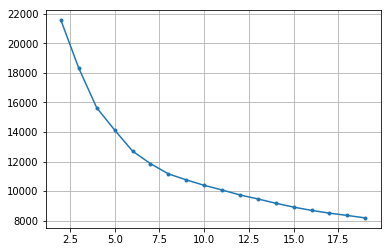

In [17]:
distance = []
for k in range(2, 20):
    
    kmeans = KMeans(n_clusters = k, random_state=0).fit(X_scaled)
    distance.append(kmeans.inertia_)
    
plt.figure()
plt.plot(np.arange(2, 20), distance, marker = '.')
plt.grid()
plt.show()



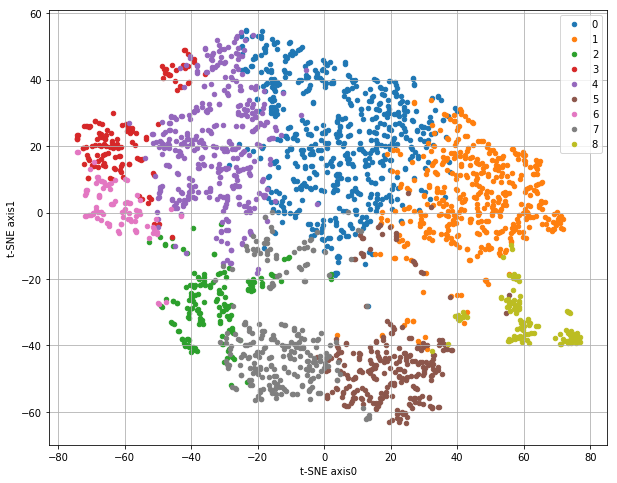

In [71]:
#kmeans = KMeans(n_clusters = 9, random_state=0).fit(X_scaled)


scaled_features_2d = TSNE(n_components = 2, perplexity = 20 ).fit_transform(X_scaled)




plt.figure(figsize = (10,8))
plt.grid()


for label in range(9):
    belongs = np.array(kmeans.labels_) == label
    member_features_2d = scaled_features_2d[belongs]
    plt.scatter(member_features_2d[:, 0], member_features_2d[:, 1],
            s = 20, label = label)
plt.legend()


plt.xlabel('t-SNE axis0')
plt.ylabel('t-SNE axis1')
plt.show()

# print(test_processed_player_data)
# kmeans.predict([test_processed_player_data['james-harden']['2017-2018']])


In [34]:
columns = 'MIN	FGM-FGA	FG%	3PM-3PA	3P%	FTM-FTA	FT%	REB	AST	BLK	STL	PF	TO	PTS'.split('\t')
columns = [metric.split('-')[-1] for metric in  columns]
columns

['MIN',
 'FGA',
 'FG%',
 '3PA',
 '3P%',
 'FTA',
 'FT%',
 'REB',
 'AST',
 'BLK',
 'STL',
 'PF',
 'TO',
 'PTS']

In [40]:
center_features = scaler.inverse_transform(kmeans.cluster_centers_)
center_features_df = pd.DataFrame(columns = columns, data = center_features)
center_features_df.index

,MIN,FGA,FG%,3PA,3P%,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,19.541667,6.022222,0.422762,2.302604,0.348304,1.267188,0.758932,2.756250,1.650694,0.253993,0.610590,1.681076,0.964583,6.853819
1,10.125416,3.040855,0.381824,1.165321,0.298392,0.679572,0.749952,1.396912,0.802138,0.124703,0.311876,0.908551,0.527316,3.213302
2,31.202027,11.741216,0.515932,0.635135,0.200020,3.998649,0.692514,9.220946,2.010135,1.433108,0.864189,2.731081,1.878378,14.927703
3,32.286923,12.583846,0.433038,3.353077,0.332038,3.492308,0.789700,3.924615,6.257692,0.306154,1.358462,2.194615,2.660000,14.836154
4,28.949046,10.605722,0.431752,4.001907,0.359305,2.506812,0.793411,3.981471,2.473297,0.333243,0.939237,2.088828,1.504632,12.644414
5,10.434524,2.499603,0.515929,0.077381,0.024595,0.931349,0.590060,2.632143,0.451587,0.376190,0.270635,1.406349,0.532937,3.099603
6,35.231461,17.332584,0.459000,4.986517,0.361404,6.433708,0.827258,5.978652,5.049438,0.537079,1.356180,2.277528,2.887640,23.070787
7,21.469721,6.229084,0.519060,0.149801,0.071231,2.062151,0.669857,5.950598,1.051793,0.857371,0.580478,2.392032,1.131474,7.835458
8,6.460185,1.735185,0.228824,0.670370,0.141065,0.176852,0.091352,0.972222,0.439815,0.074074,0.186111,0.625926,0.341667,1.204630


In [72]:
print(kmeans.predict(scaler.transform([test_processed_player_data['clint-capela']['2017-2018']])))


[test_processed_player_data['clint-capela']['2017-2018']]

[2]


[[27.5, 9.1, 0.652, 0.0, 0.0, 3.5, 0.56, 10.8, 0.9, 1.9, 0.8, 2.5, 1.4, 13.9]]

In [66]:
from collections import Counter

dict(Counter(kmeans.labels_))



{6: 89, 3: 130, 4: 367, 2: 148, 0: 576, 1: 421, 7: 251, 5: 252, 8: 108}

In [55]:
test_processed_player_data.keys()

dict_keys(['james-harden', 'anthony-davis', 'lebron-james', 'damian-lillard', 'giannis-antetokounmpo', 'stephen-curry', 'kevin-durant', 'russell-westbrook', 'demarcus-cousins', 'devin-booker', 'kyrie-irving', 'lamarcus-aldridge', 'victor-oladipo', 'demar-derozan', 'joel-embiid', 'kristaps-porzingis', 'bradley-beal', 'lou-williams', 'jimmy-butler', 'kemba-walker', 'paul-george', 'blake-griffin', 'cj-mccollum', 'karl-anthony-towns', 'donovan-mitchell', 'khris-middleton', 'marshon-brooks', 'klay-thompson', 't.j.-warren', 'john-wall', 'tyreke-evans', 'dennis-schroder', 'jrue-holiday', 'harrison-barnes', 'chris-paul', 'tobias-harris', 'nikola-jokic', 'eric-gordon', 'jeremy-lin', 'evan-fournier', 'eric-bledsoe', 'andrew-wiggins', 'aaron-gordon', 'kevin-love', 'tim-hardaway-jr.', 'gary-harris', 'goran-dragic', 'marc-gasol', 'jj-redick', 'mike-conley', 'zach-lavine', 'jamal-murray', 'dwight-howard', 'nikola-vucevic', 'kyle-lowry', 'kawhi-leonard', 'carmelo-anthony', 'julius-randle', 'kyle-kuzm

In [74]:
with open('player_cluster.pkl', 'wb') as fp:
    pickle.dump(kmeans, fp)
with open('player_cluster_scaler.pkl', 'wb') as fp:
    pickle.dump(scaler, fp)